### The following is a test

It shows plots for an exponential decaying 440 Hz sine wave mixed with recorded background noise.

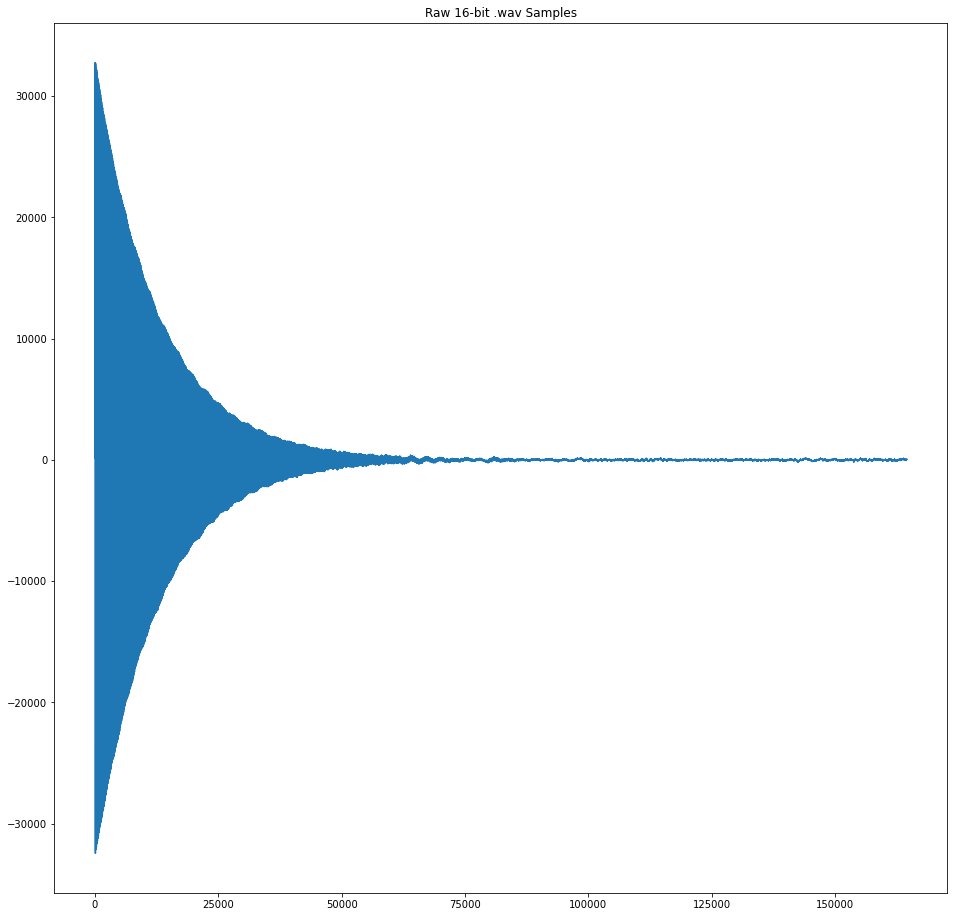

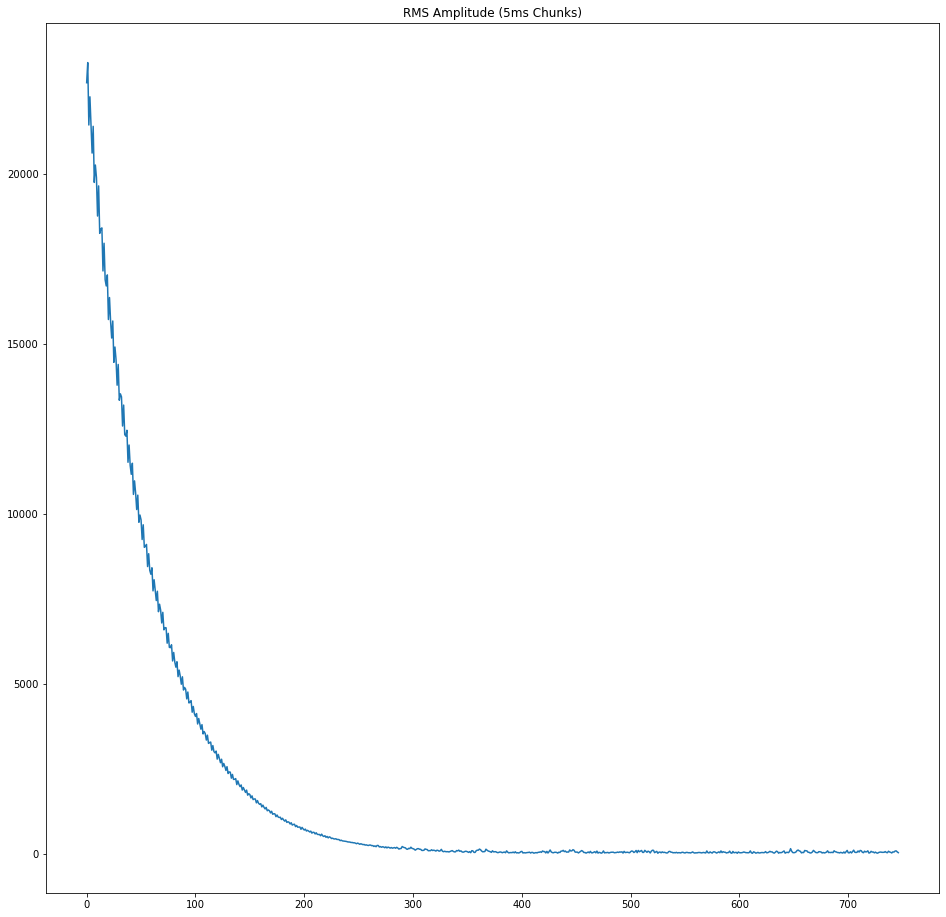

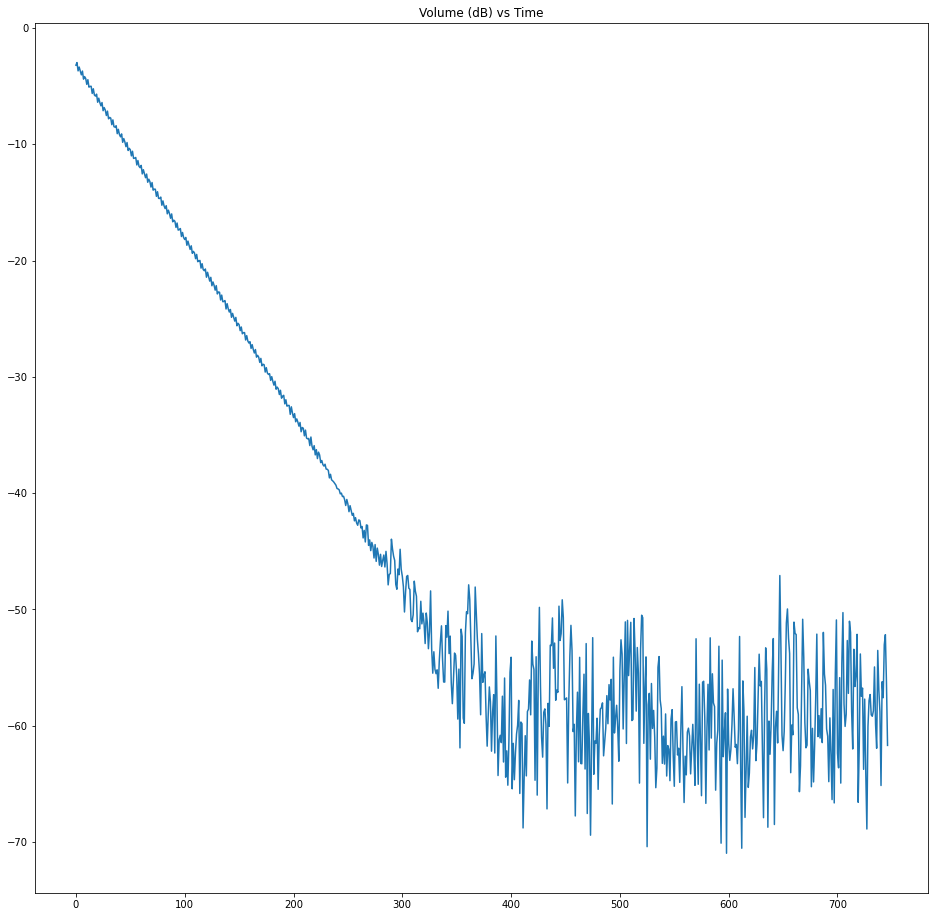

In [28]:
##### import sys
import wave
from math import *
import numpy
from statistics import mean
import matplotlib.pyplot as plt

fig_ratio = 1/1
fig_scale = 16
def plot_graph(y, name):
    plt.figure(figsize=(fig_ratio*fig_scale, fig_scale))
    plt.title(name)
    plt.plot(y)
    plt.show()

# open *.wav file
clap_wav = wave.open('test.wav')
if clap_wav.getnchannels() != 1:
    raise Exception("Make sure .wav is mono")
if clap_wav.getframerate() != 44100:
    raise Exception("Make sure .wav has a sampling rate of 44.1 kHz")

# read raw samples
clap_samples = clap_wav.readframes(-1)
clap_samples = numpy.frombuffer(clap_samples, dtype='int16')
plot_graph(clap_samples, 'Raw 16-bit .wav Samples')

# split samples into chunks, then take the RMS of each chunk.
chunk_ms = 5
chunk_samples = int(44100 * (chunk_ms / 1000))
recalculated_chunk_ms = chunk_ms # TODO
n_chunks = int(len(clap_samples) / chunk_samples)
clap_samples = clap_samples[0 : n_chunks*chunk_samples] # truncate to chunk multiple
chunks = numpy.split(clap_samples, n_chunks)
def rms(nums):
    square_nums = [numpy.int64(x)**2 for x in nums]
    return sqrt(mean(square_nums))
chunk_mean = [rms(chunk) for chunk in chunks]
plot_graph(chunk_mean, f'RMS Amplitude ({chunk_ms}ms Chunks)')

# calculate volume dB
def to_db(p_avg):
    P_0 = numpy.iinfo(numpy.int16).max
    if p_avg == 0: # to prevent math errors
        return 20 * log10(1 / P_0)
    return 20 * log10(p_avg / P_0)
db = [to_db(m) for m in chunk_mean]
plot_graph(db, 'Volume (dB) vs Time')




## Analysis
The RT60 is our main metric for measuring the amount of reverberation an audio signal experiences. It is defined as the time it takes for the audio signal to decay by 60 dB from it's peak amplitude. Although louder signals will take longer to completely die out, the RT60 metric is independent on the loudness of the audio source. This is useful in a setting in which the audio source cannot perfectly be reproduced between experiments.

It may be difficult to determine the RT60 by looking at the plot, since the signal may not fall by 60 dB before hitting the noise floor. However, the RT60 can be estimated by determining the RT30 and multiplying by 2.